# MLP

In this notebook, we will go through basics of MLP using MNIST dataset. We will implement this using two popular deep learning frameworks `Keras` and `PyTorch`. 

Here we will use [keras](https://keras.io "Keras's Homepage").

Hey yo, but what is MLP? what is MNIST? 

Everything is explained in-detail in [blog post](dudeperf3ct.github.io). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/MLP/mnist_mlp_keras.ipynb)


In [1]:
# load all the required libraries

import numpy as np                                    # package for computing
from sklearn.model_selection import train_test_split  # split dataset
import keras                                          # import keras with tensorflow as backend
from keras.datasets import mnist                      # import mnist dataset from keras 
from keras.models import Model, Sequential            # sequential and functional api keras 
from keras.layers import Dense, Input                 # dense and input layer for constructing mlp

import matplotlib.pyplot as plt             # matplotlib library for plotting

# display plots inline (in notebook itself)
%matplotlib inline                          

Using TensorFlow backend.


## MNIST Dataset


 
The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples each of size 28 x 28 pixels. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Here is one example from dataset




In [2]:
# load mnist data

# the data, split between train and validation sets
(train_x, train_y), (test_x, test_y) = mnist.load_data()

#orginally shape (60000, 28, 28) for train and (10000, 28, 28) for test
#but as we will be using fully connected layers we will flatten
#the images into 1d array of 784 values instead of (28 x 28) 2d array
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

# As image is grayscale it has values from [0-255] which we will visualize below
# convert dtype to float32 and scale the data from [0-255] to [0-1]
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

print('Training samples and shape:', train_x.shape[0], train_x.shape)
print('Test samples and shape:', test_x.shape[0], test_x.shape)

Training samples and shape: 60000 (60000, 784)
Test samples and shape: 10000 (10000, 784)


In [3]:
# we will split val into --> 20% val set and 80% test set 
# stratify ensures the distribution of classes is same in both the sets

val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.8, stratify=test_y)

print ('Validation samples and shape', val_x.shape[0], val_x.shape)
print ('Test samples and shape', test_x.shape[0], test_x.shape)

Validation samples and shape 2000 (2000, 784)
Test samples and shape 8000 (8000, 784)


## Visualization of data

Enough talk, show me the data!

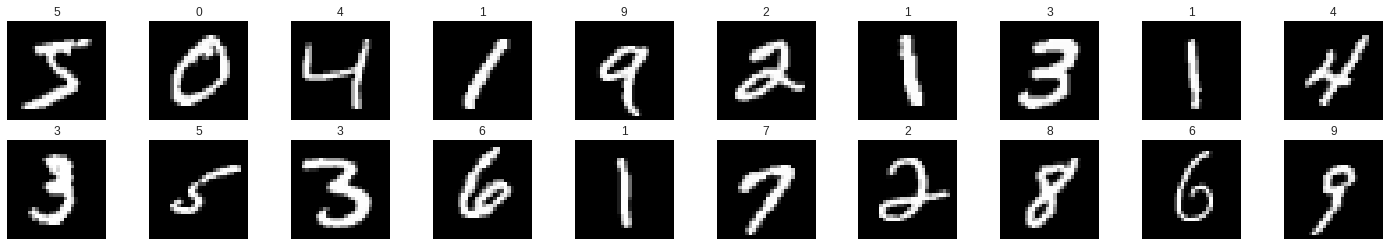

In [4]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx].reshape(28, 28), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(train_y[idx]))

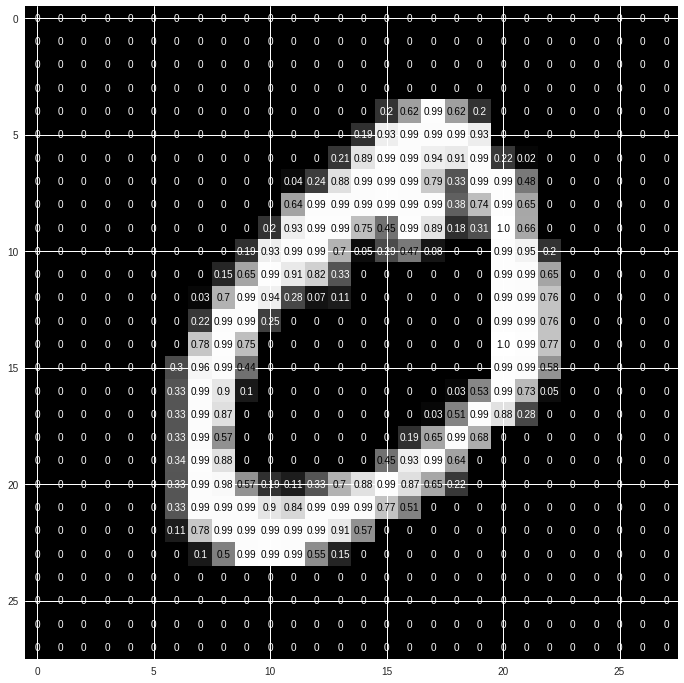

In [5]:
img = train_x[1].reshape(28, 28)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

## Sequential API

In [0]:
# [0-9] unique labels
num_classes = 10
epochs = 5
batch_size = 32

In [7]:
# convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)
print ('Training labels shape:', train_y.shape)

Training labels shape: (60000, 10)


In [8]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 628,170
Trainable params: 628,170
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 60000 samples, validate on 2000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.2241 - acc: 0.9344 - val_loss: 0.1171 - val_acc: 0.9665
Epoch 2/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0857 - acc: 0.9735 - val_loss: 0.0896 - val_acc: 0.9740
Epoch 3/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.0559 - acc: 0.9826 - val_loss: 0.0756 - val_acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 19s 322us/step - loss: 0.0416 - acc: 0.9861 - val_loss: 0.0744 - val_acc: 0.9790
Epoch 5/5
60000/60000 [==============================] - 19s 315us/step - loss: 0.0321 - acc: 0.9895 - val_loss: 0.0911 - val_acc: 0.9705


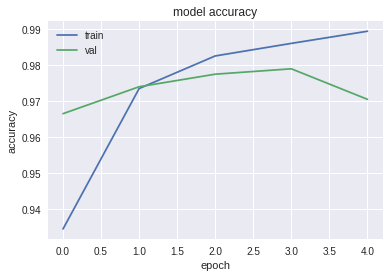

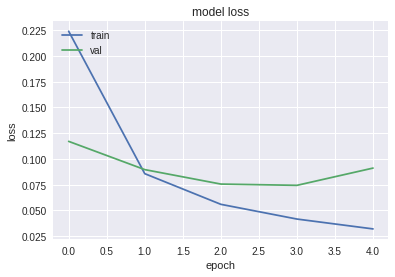

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09847150552645326
Test accuracy: 0.97375


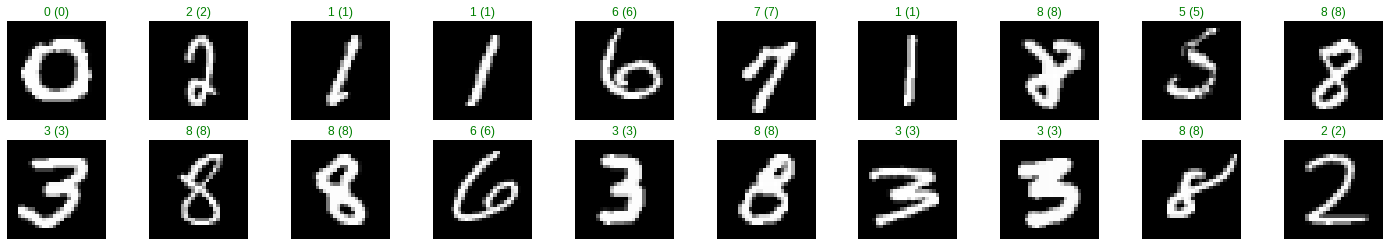

In [12]:
# obtain one batch of test images
images, labels = test_x[:32], test_y[:32]

# get sample outputs
predict = model.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Text(0.5,1,'100.00 % accuracy')

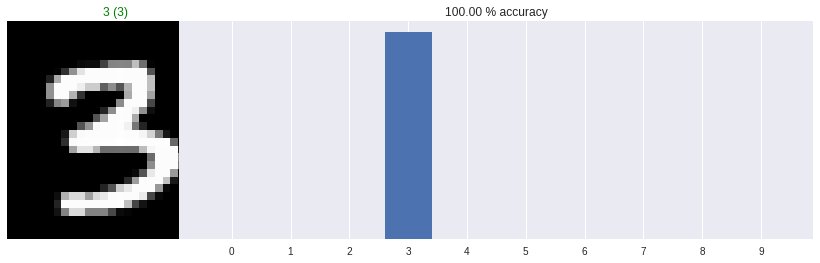

In [13]:
import random

random_idx = random.randint(0, len(test_x))

# get sample outputs
predict = model.predict(test_x[None, random_idx])
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(test_y, axis=1)


# plot the images one example, along with predicted and true labels and probabilities
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(test_x[random_idx].reshape((28, 28)), cmap='gray')
ax.set_title("{} ({})".format(str(preds[0]), str(labels[random_idx])),
             color=("green" if preds[0]==labels[random_idx] else "red"))
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
x_labels = np.arange(10)
ax.bar(np.arange(10), height=np.squeeze(predict), tick_label=x_labels)
ax.set_title("{:.2f} % accuracy".format(float(np.max(predict, axis=1)*100)))

## Functional API

In [0]:
# [0-9] unique labels
num_classes = 10
epochs = 5
batch_size = 32

In [0]:
inputs = Input(shape=(784,))
x = Dense(784, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 60000 samples, validate on 2000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 326us/step - loss: 0.2182 - acc: 0.9353 - val_loss: 0.1046 - val_acc: 0.9675
Epoch 2/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0863 - acc: 0.9735 - val_loss: 0.0912 - val_acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 19s 320us/step - loss: 0.0570 - acc: 0.9819 - val_loss: 0.0762 - val_acc: 0.9770
Epoch 4/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0716 - val_acc: 0.9780
Epoch 5/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0309 - acc: 0.9900 - val_loss: 0.0632 - val_acc: 0.9795


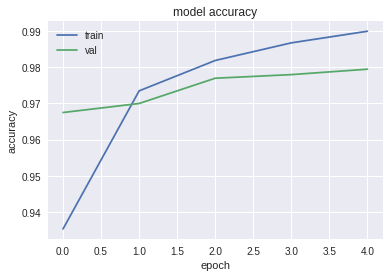

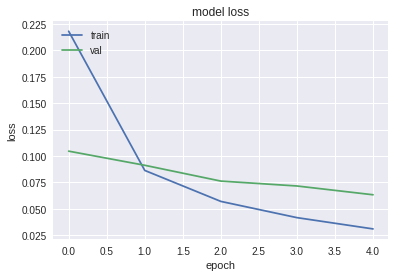

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06780428812978789
Test accuracy: 0.980125


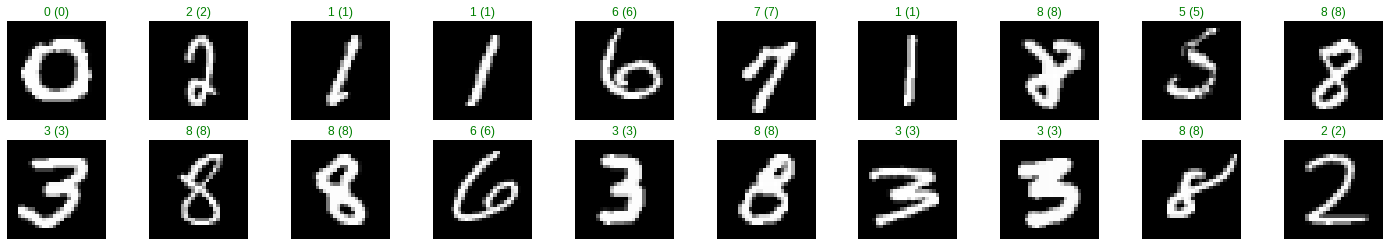

In [19]:
# obtain one batch of test images
images, labels = test_x[:32], test_y[:32]

# get sample outputs
predict = model.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Text(0.5,1,'100.00 % accuracy')

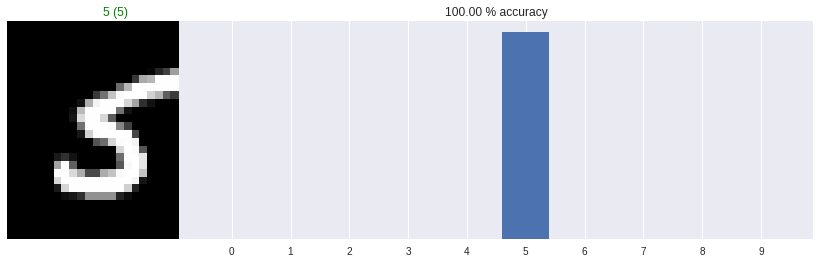

In [20]:
import random

random_idx = random.randint(0, len(test_x))

# get sample outputs
predict = model.predict(test_x[None, random_idx])
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(test_y, axis=1)


# plot the images one example, along with predicted and true labels and probabilities
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(test_x[random_idx].reshape((28, 28)), cmap='gray')
ax.set_title("{} ({})".format(str(preds[0]), str(labels[random_idx])),
             color=("green" if preds[0]==labels[random_idx] else "red"))
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
x_labels = np.arange(10)
ax.bar(np.arange(10), height=np.squeeze(predict), tick_label=x_labels)
ax.set_title("{:.2f} % accuracy".format(float(np.max(predict, axis=1)*100)))